In [4]:
import csv
import numpy as np 
from sklearn import preprocessing
import statistics as st
import matplotlib.pyplot as plt
import math

In [8]:
# plot formatting

plt.rcParams['font.size'] = 10
plt.rcParams['lines.markersize'] = 4
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['figure.dpi'] = 150

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

## Loading Data

In [9]:
# Load Feature variables and their names
X = np.loadtxt('hitters.x.csv',delimiter=',', skiprows=1)
with open('hitters.x.csv','r') as f: 
    x_colnames = next(csv.reader(f))

In [10]:
y = np.loadtxt('hitters.y.csv',delimiter=',', skiprows=1)

## Feature Scaling

In [11]:
X_scaled = preprocessing.scale(X)

## Augmented matrices

In [12]:
[m,n] = X.shape
print(m,n)
X_til = np.concatenate((np.ones((m,1)),X_scaled),axis=1)
I_til = np.ones((n,n))
z = np.zeros((n,1))
I_til = np.concatenate((z,I_til),axis=1)
z = np.zeros((1,20))
I_til = np.concatenate((z,I_til),axis=0)
I_til.shape

263 19


(20, 20)

## Scaling without preprocessor library

In [13]:
X_scl = np.zeros((m,n))
for i in range(0,n):
    s = st.mean(X[:,i])
    sig = max(X[:,i]) - min(X[:,i])
    X_scl[:,i] = (X[:,i] - s)/sig 
X0 = np.ones((m,1))
print(X_scl.shape)
print(X_scl.shape, X_scaled.shape)


(263, 19)
(263, 19) (263, 19)


## Initializing Lambda 

In [14]:
lmd = np.logspace(-3,7,100)[np.newaxis]
lmd.shape


(1, 100)

## Evaluating Ridge Regression Estimate for all Lambda 

In [15]:
def estim(X,Y,flag_lsq,lmd):
    XtX = X.T @ X
    XtY = X.T @ Y
    if (flag_lsq == 1):
        tht = np.matmul(np.linalg.inv(XtX),XtY)
    elif (flag_lsq == 0):
        I = np.identity(X.shape[1])
        tht = np.linalg.inv(XtX+lmd*I) @ XtY
    return tht

tht_ridge = np.array([estim(X_til,y,0,lmd0) for lmd0 in lmd[0,:]] )
print(tht_ridge.shape)

(100, 20)


## l2 norm

In [16]:
l2 = np.sqrt(np.sum(tht_ridge[:,1:]**2,1))[np.newaxis]
tht_lsq = estim(X_til,y,0,lmd[0,0]) 

## Plot

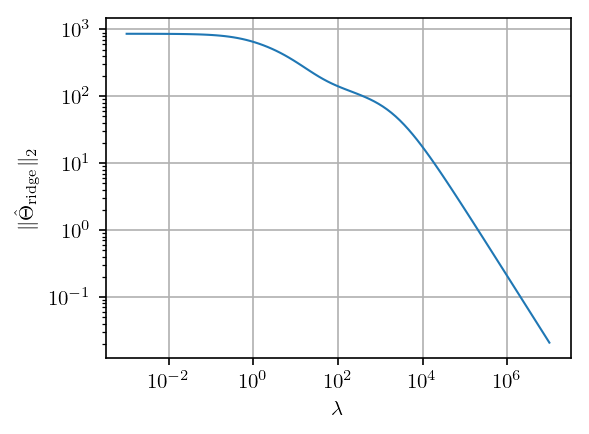

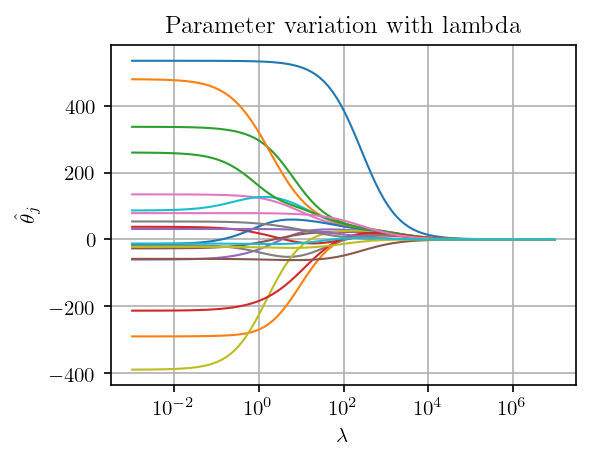

In [17]:
plt.grid()
plt.loglog(lmd[0,:],l2[0,:])
plt.xlabel('$\lambda$')
plt.ylabel('$\|\hat{\Theta}_\mathrm{ridge}\|_2$')
plt.show()

plt.grid()
for i in range(0,20):
    plt.semilogx(lmd[0,:],tht_ridge[:,i])
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\hat{\theta}_j$')
plt.title('Parameter variation with lambda')
plt.show()

## Least Square Estimate

In [21]:
tht_lsq = np.linalg.inv(XtX)@XtY
print(tht_lsq)
print(tht_ridge[0,:])

NameError: name 'XtX' is not defined

# 5-fold Cross Validation

### Function to calculate error

In [22]:
def error(X,Y,tht):
    l201 = np.sqrt(st.mean((Y- X @tht)**2))
    err = l201
    return err

## Dividing the data in 5 sets 

### Calculation of mean error 

In [23]:
[a,b] = X_til.shape
ind = np.linspace(0,260,num=6,dtype=np.int16)
err0 = np.zeros(100)[np.newaxis]
for j in range(0,100):
    err1 = np.zeros(5).tolist()
    for i in range(0,ind.size-1):
        ind_tmp = np.arange(ind[0],ind[i],1).tolist()+np.arange(ind[i+1],ind[-1],1).tolist()
        ind_val = np.arange(ind[i],ind[i+1],1).tolist()
        Xtmp = np.take(X_til,ind_tmp,axis=0)
        Xval = np.take(X_til,ind_val,axis=0)
        y_tmp = np.take(y,ind_tmp,axis=0)
        y_val = np.take(y,ind_val,axis=0)
        tht = estim(Xtmp,y_tmp,0,lmd[0,j])
        err1[i] = error(Xval,y_val,tht)
    err0[0,j] = np.mean(err1)


## Error Plot vs Hyperparameter

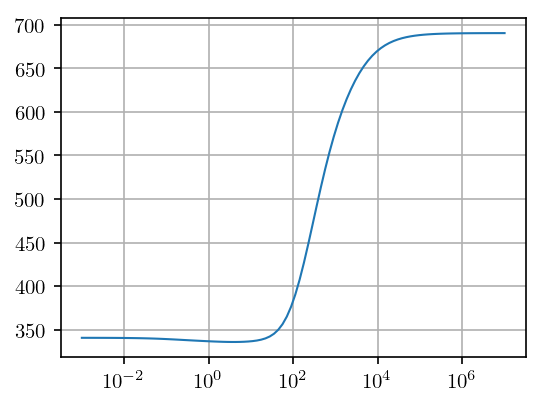

Best value of lambda = 4.32876


In [24]:
plt.grid()
plt.semilogx(lmd[0,:],err0[0,:])
plt.show()
best_lmd_idx = np.argmin(err0)
best_lmd = lmd[0,best_lmd_idx]
print('Best value of lambda = %.5f' % best_lmd)

In [25]:
tht_ridge_best = estim(X_til, y, 0,best_lmd)
for i, feature_name in sorted(enumerate(['bias'] + x_colnames), key=lambda x: tht_ridge_best[x[0]]):
    print('%s: %g' % (feature_name, tht_ridge_best[i]))

AtBat: -200.654
CWalks: -136.358
CAtBat: -75.4697
DivisionW: -61.9238
Years: -52.2524
Errors: -25.2977
NewLeagueN: -13.3198
HmRun: -1.13128
Runs: 4.98787
RBI: 7.4262
LeagueN: 29.9891
Assists: 37.2466
CHmRun: 59.0227
PutOuts: 77.245
Walks: 102.345
CRBI: 109.831
CHits: 116.958
CRuns: 180.736
Hits: 215.612
bias: 527.248


# Problem 4

In [26]:
def errorLSQ(X,Y,tht):
    l201 = st.mean((X @tht-Y)**2)
    err = l201
    return err


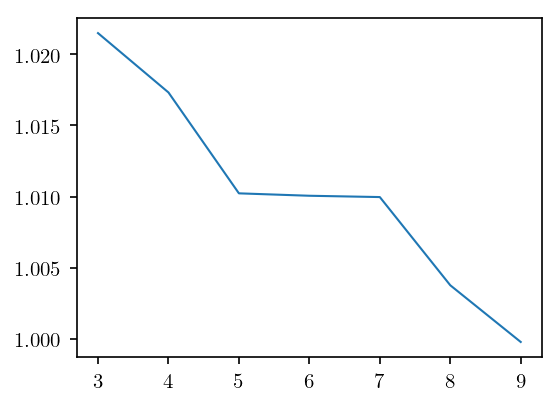

In [27]:
w0,w1 = 1,1 
n = 100
x = np.random.rand(n)
y = w1*x + w0*np.ones(n) + np.random.randn(n)

D = np.arange(3,10)
err = []
for i, d in enumerate(D):
    X = x[:,None]** np.arange(0,d)[None,:]
    tht = estim(X,y,1,0)
    err.append(errorLSQ(X,y,tht))

plt.plot(D,err)
plt.show()

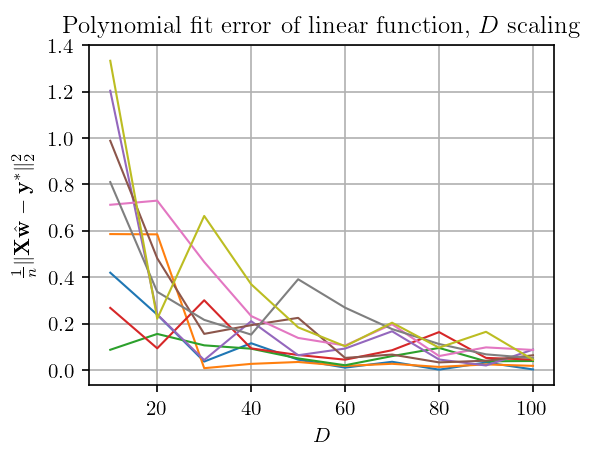

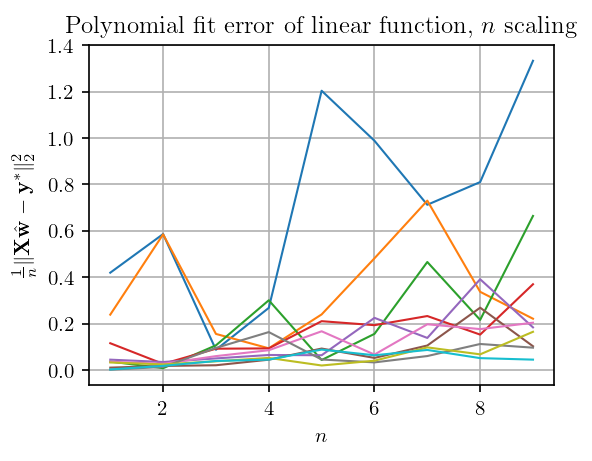

(9, 10)

In [42]:
def errorPoly(x,y,tht):
    err = np.mean((tht(x)-y)**2)
    return err
w0,w1 = 1,1 
N = np.linspace(10,100,num=10,dtype=np.int16)
D = np.arange(1,10)
err = []
err0= []
for i, d in enumerate(D):
    err = []
    for j,n in enumerate(N):
        x = np.random.rand(n)
        y_star = w1*x + w0*np.ones(n) 
        y = y_star + np.random.randn(n)
        X = x[:,None]** np.arange(0,d)[None,:]
        tht = np.poly1d(np.polyfit(x,y,d))
        err.append(errorPoly(x,y_star,tht))
    plt.plot(N,err)
    err0.append(err)
    del err
err0 = np.array(err0)
plt.title('Polynomial fit error of linear function, $D$ scaling')
plt.ylabel(r'$\frac{1}{n}\|\mathbf{X}\hat{\mathbf{w}} - \mathbf{y^*}\|_2^2$')
plt.xlabel('$D$')
plt.grid()
plt.show()
for i in range(err0.shape[1]):
    plt.plot(D,err0[:,i])
plt.title('Polynomial fit error of linear function, $n$ scaling')
plt.ylabel(r'$\frac{1}{n}\|\mathbf{X}\hat{\mathbf{w}} - \mathbf{y^*}\|_2^2$')
plt.xlabel('$n$')
plt.grid()
plt.show()
err0.shape

## Example 4.7

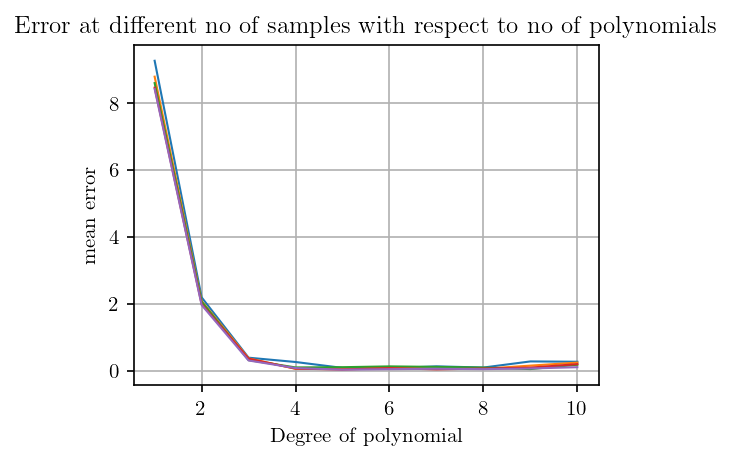

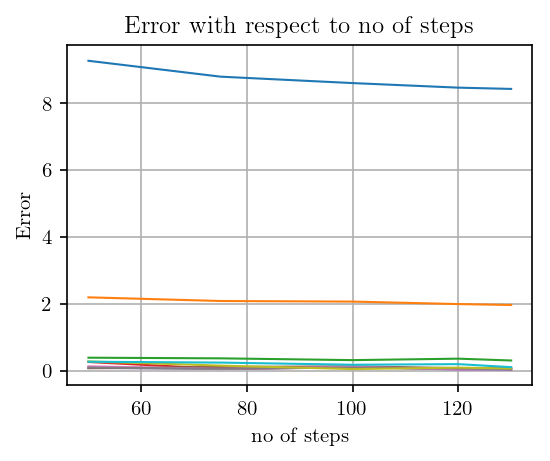

In [60]:
# no of points
N = [50,75, 100, 120,130]
# degree of polynomial
D = np.linspace(1,10,num= 10,dtype= np.int16)
plt.grid()
err0=[]
for i, n in enumerate(N):
    err = []
    for j, d in enumerate(D):
        x = np.linspace(-4,3,num= n,endpoint=True)
        y_star = np.exp(x)
        y = y_star + np.random.randn(n)
        tht = np.poly1d(np.polyfit(x,y,d))
        err.append(errorPoly(x,y_star,tht))
    plt.plot(D,err)
    err0.append(err)
plt.xlabel('Degree of polynomial')
plt.ylabel('mean error')
plt.title('Error at different no of samples with respect to no of polynomials')
plt.show()

err0 = np.array(err0)
for i in range(err0.shape[1]):
    plt.plot(N,err0[:,i])
plt.grid()
plt.xlabel('no of steps')
plt.ylabel('Error')
plt.title('Error with respect to no of steps')
plt.show()